In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Functions

In [49]:
from myfuncs import *

In [50]:
pd.set_option("display.max_columns", 50)

In [51]:
def box_plot_sns(df):
    """Plot boxplot of a dataframe.
    Args:
        df(DataFrame): Pandas DataFrame
    Returns:
        The Seaborn boxplot.
    """
    return sns.boxplot(data=df)

In [52]:
df = pd.read_csv('pima-indians-diabetes data.csv')

In [53]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [54]:
df.tail()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0.0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0.0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1.0
767,1.0,93.0,70.0,31.0,NaN,30.4,0.315,23,0.0


In [55]:
general_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB
None
**************************************************
Missing Values
Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


## Visualization 

**Total counts per target value.**

In [56]:
df['Class'].value_counts()

0.0    500
1.0    268
Name: Class, dtype: int64

- Class is quite imbalanced. Could use SMOTE or other methods if get poor result

<AxesSubplot:xlabel='Class', ylabel='count'>

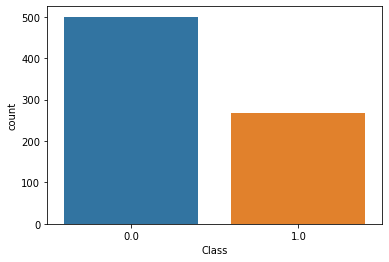

In [57]:
sns.countplot(x='Class',data=df)

In [58]:
get_all_columns(df)

['Pregnant',
 'Glucose',
 'Diastolic_BP',
 'Skin_Fold',
 'Serum_Insulin',
 'BMI',
 'Diabetes_Pedigree',
 'Age',
 'Class']

In [59]:
get_feature_columns(df)

['Pregnant',
 'Glucose',
 'Diastolic_BP',
 'Skin_Fold',
 'Serum_Insulin',
 'BMI',
 'Diabetes_Pedigree',
 'Age']

In [60]:
get_target_column(df)

'Class'

## EDA

### Histogram using Pandas DataFrame (Matplotlib)

- pd.DataFrame.hist(column='your_data_column')
- pd.DataFrame.plot(kind='hist')
- pd.DataFrame.plot.hist()

array([[<AxesSubplot:title={'center':'Pregnant'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'Diastolic_BP'}>],
       [<AxesSubplot:title={'center':'Skin_Fold'}>,
        <AxesSubplot:title={'center':'Serum_Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Diabetes_Pedigree'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

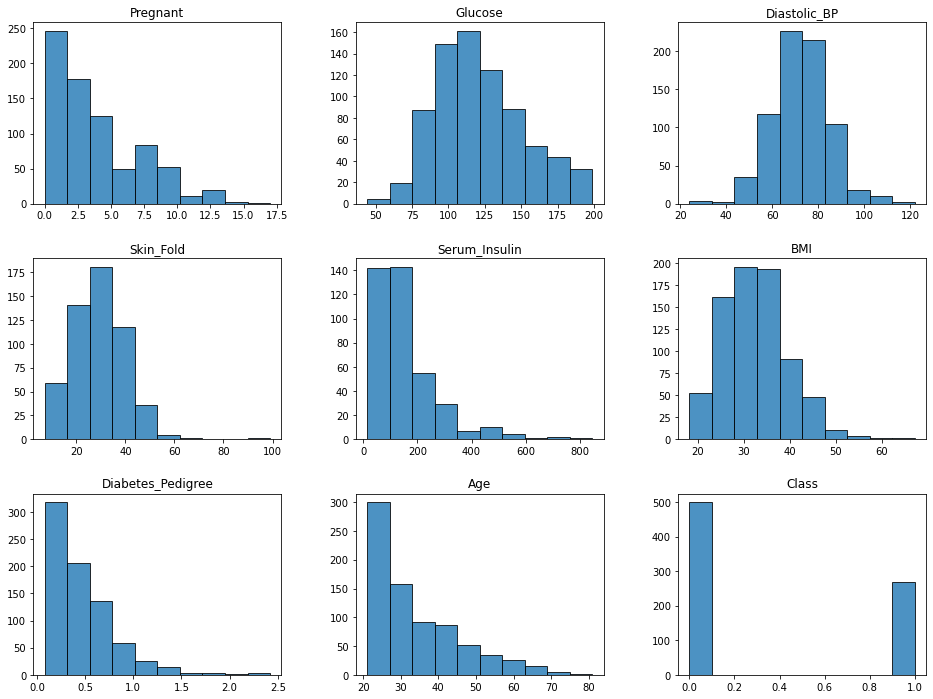

In [61]:
# df.hist(figsize=(16,12), grid=False,  edgecolor="black", alpha=0.8)
# facecolor="color_you_want",

hist_plot_pd(df)

### Histogram using Seaborn

In [62]:
len(df.columns)

9

In [63]:
import math
rows = math.ceil(len(df.columns)/2)

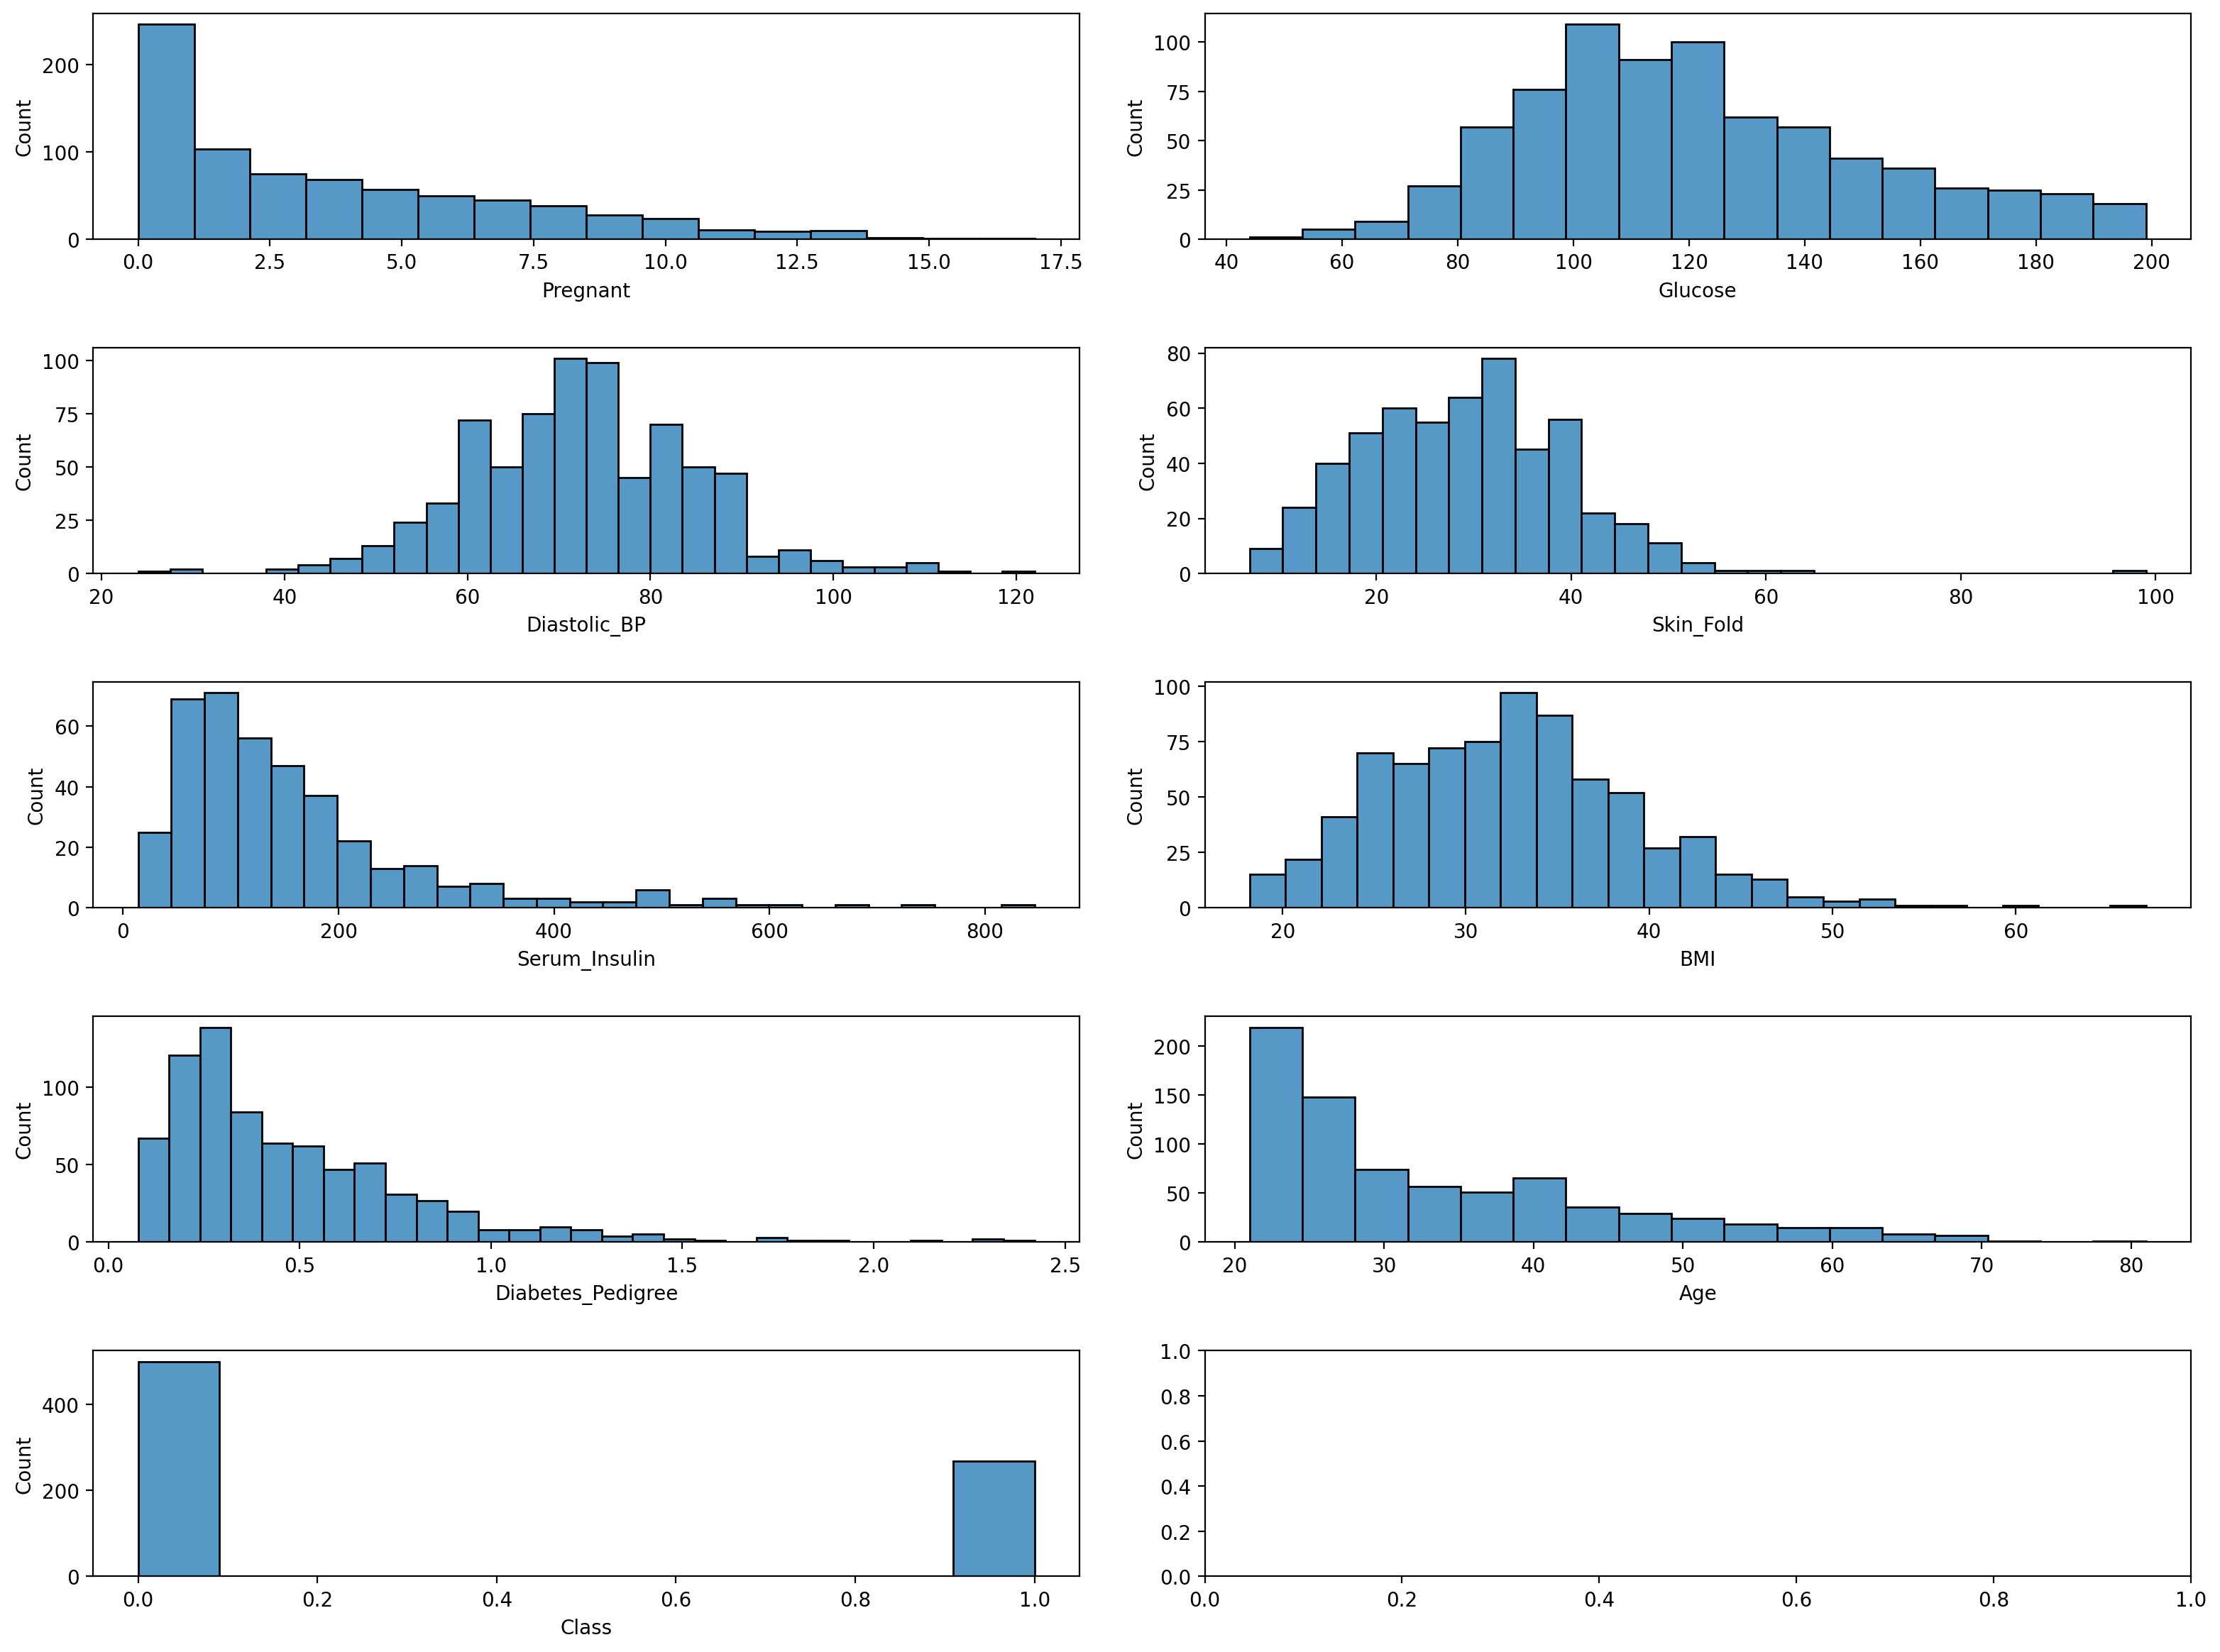

In [64]:
fig, axes = plt.subplots(rows,2 ,figsize=(16,12), dpi=200)


sns.histplot(ax=axes[0,0], data = df, x = 'Pregnant')
sns.histplot(ax=axes[0,1], data = df, x = 'Glucose' )

sns.histplot(ax=axes[1,0], data = df, x = 'Diastolic_BP' )
sns.histplot(ax=axes[1,1], data = df, x = 'Skin_Fold' )

sns.histplot(ax=axes[2,0], data = df, x = 'Serum_Insulin')
sns.histplot(ax=axes[2,1], data = df, x = 'BMI' )

sns.histplot(ax=axes[3,0], data = df, x = 'Diabetes_Pedigree' )
sns.histplot(ax=axes[3,1], data = df, x = 'Age' )

sns.histplot(ax=axes[4,0], data = df, x = 'Class' )

plt.tight_layout(pad=2)

### Seaborn Boxplot

<AxesSubplot:>

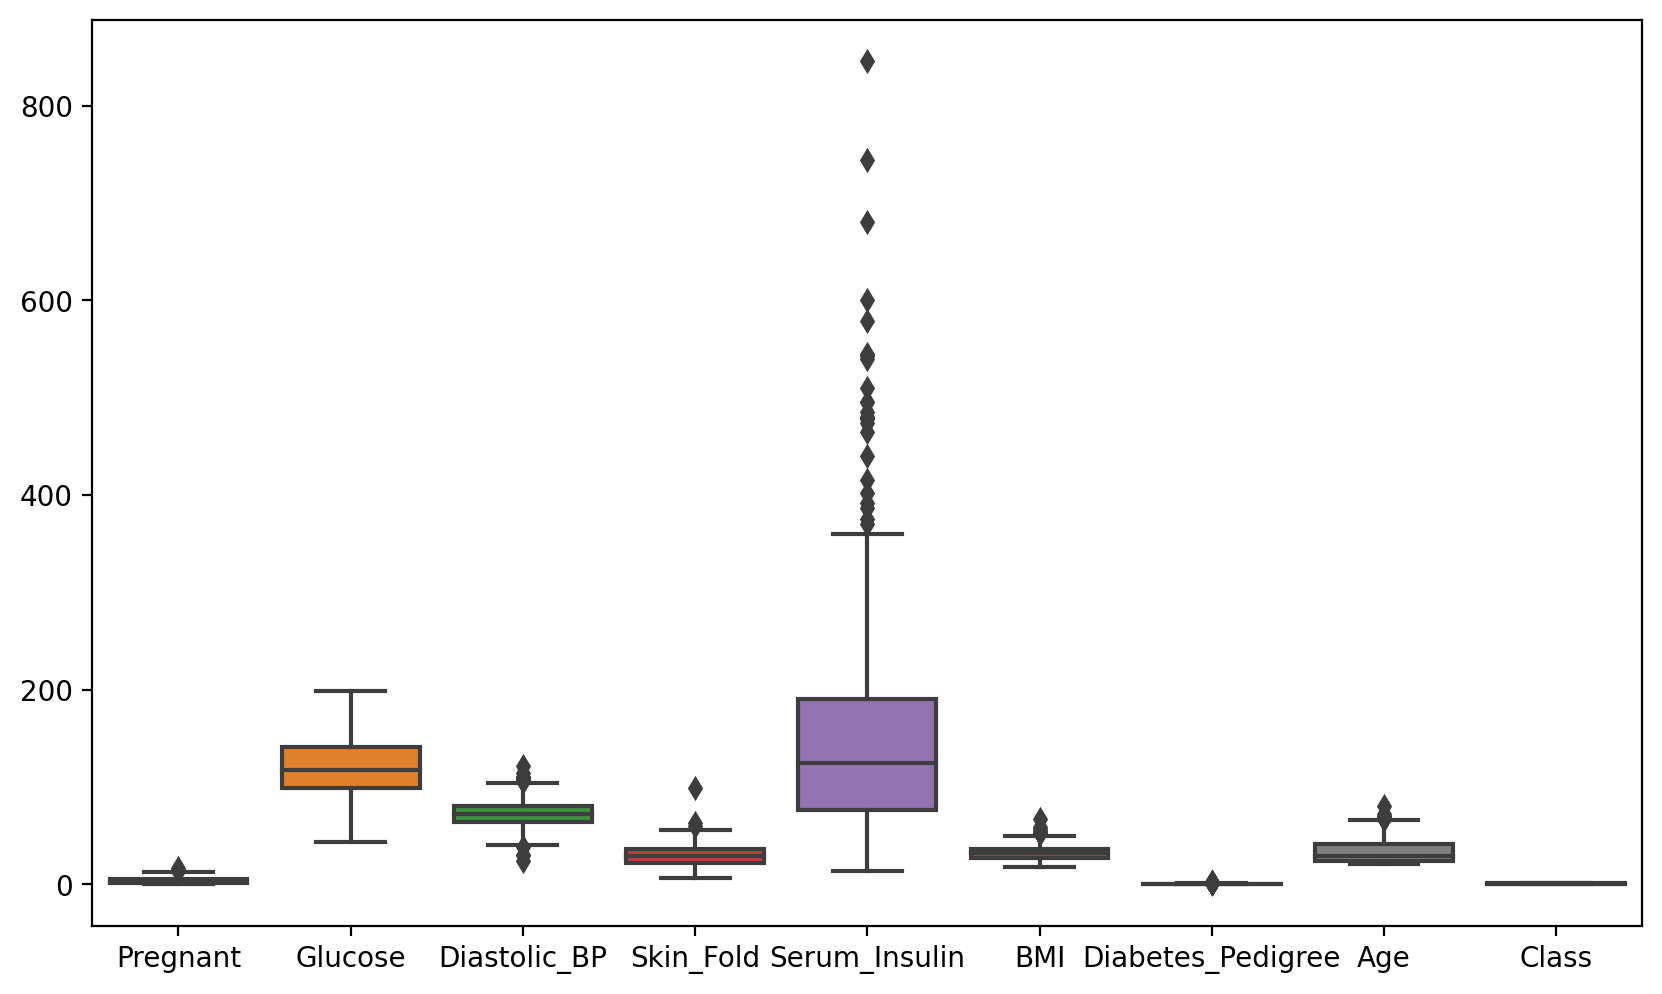

In [65]:
plt.figure(figsize=(10,6), dpi=200)
box_plot_sns(df)

### Seaborn Pairplot

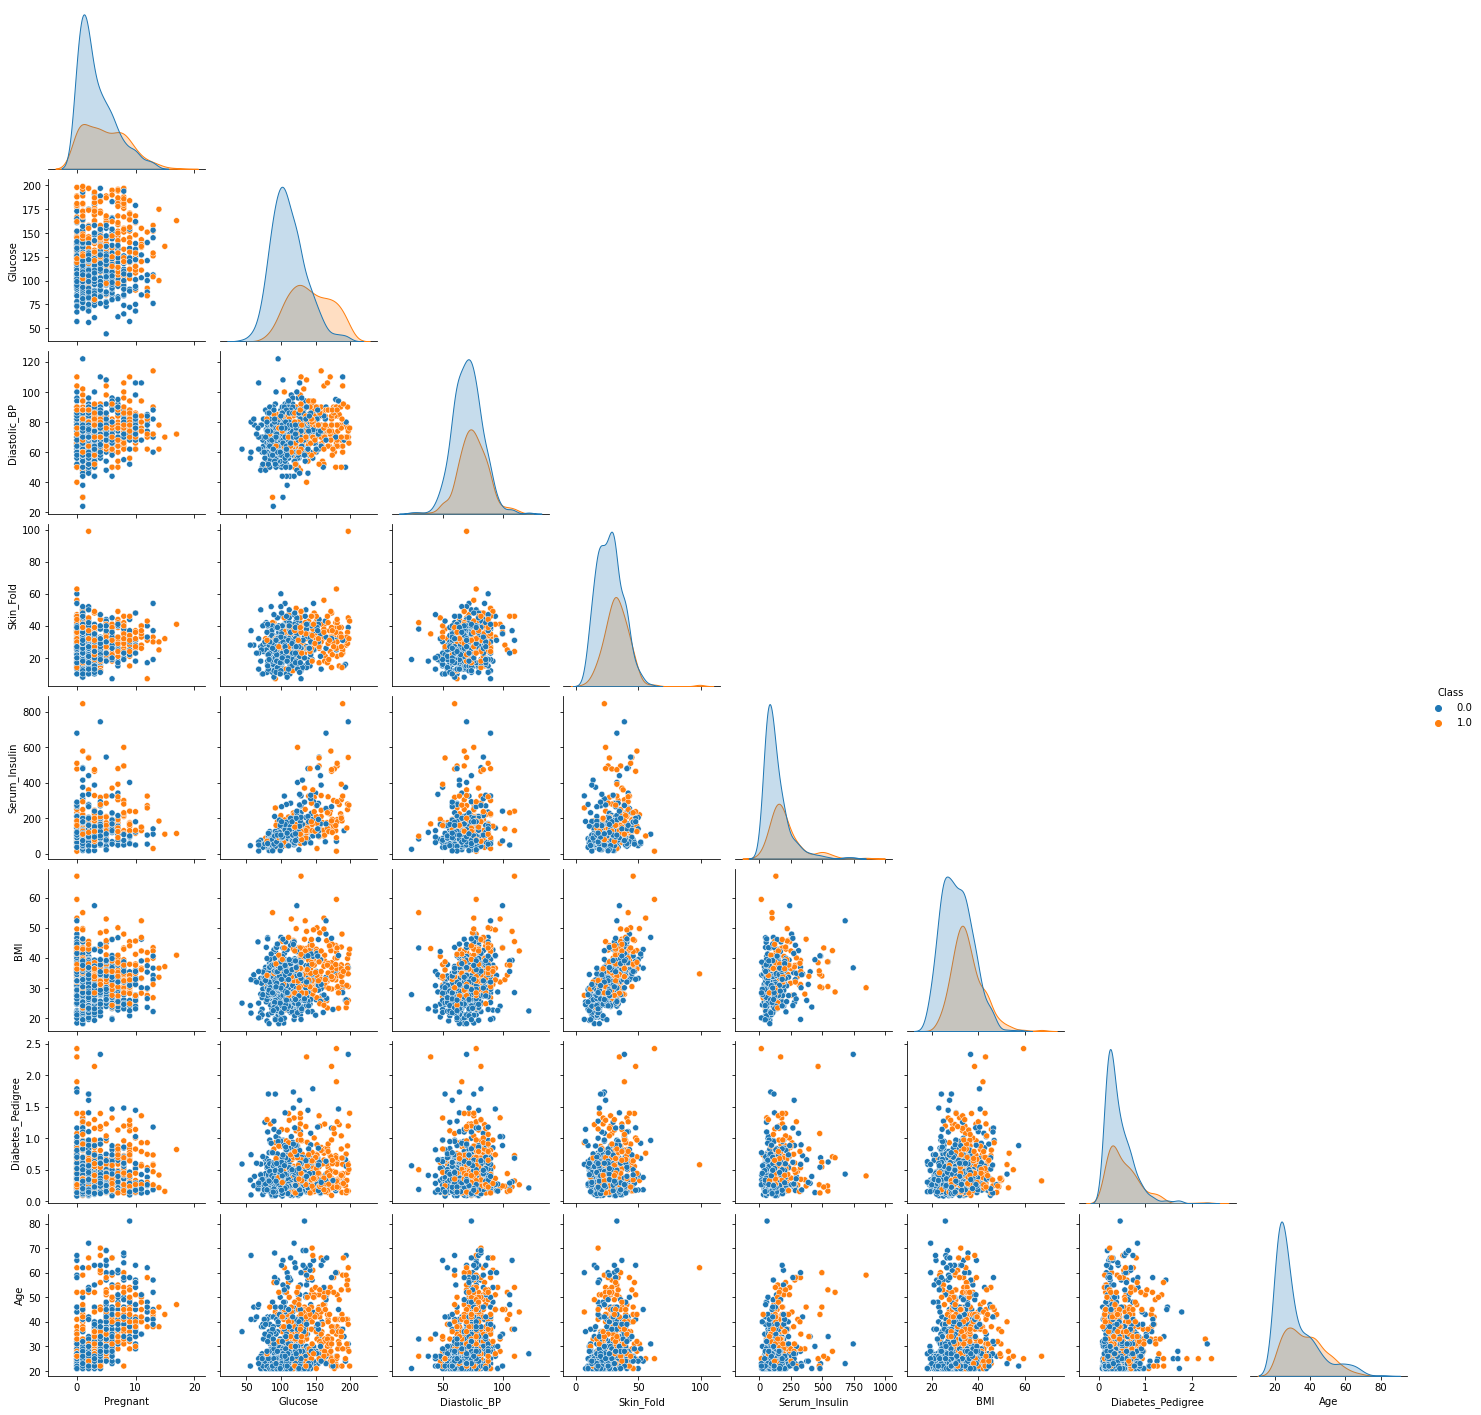

In [66]:
sns.pairplot(df, corner=True, hue="Class")

### Seaborn Correlation Heatmap

In [67]:
def heatmap_corr(df):
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    sns.heatmap(df.corr(), mask=mask, annot=True)

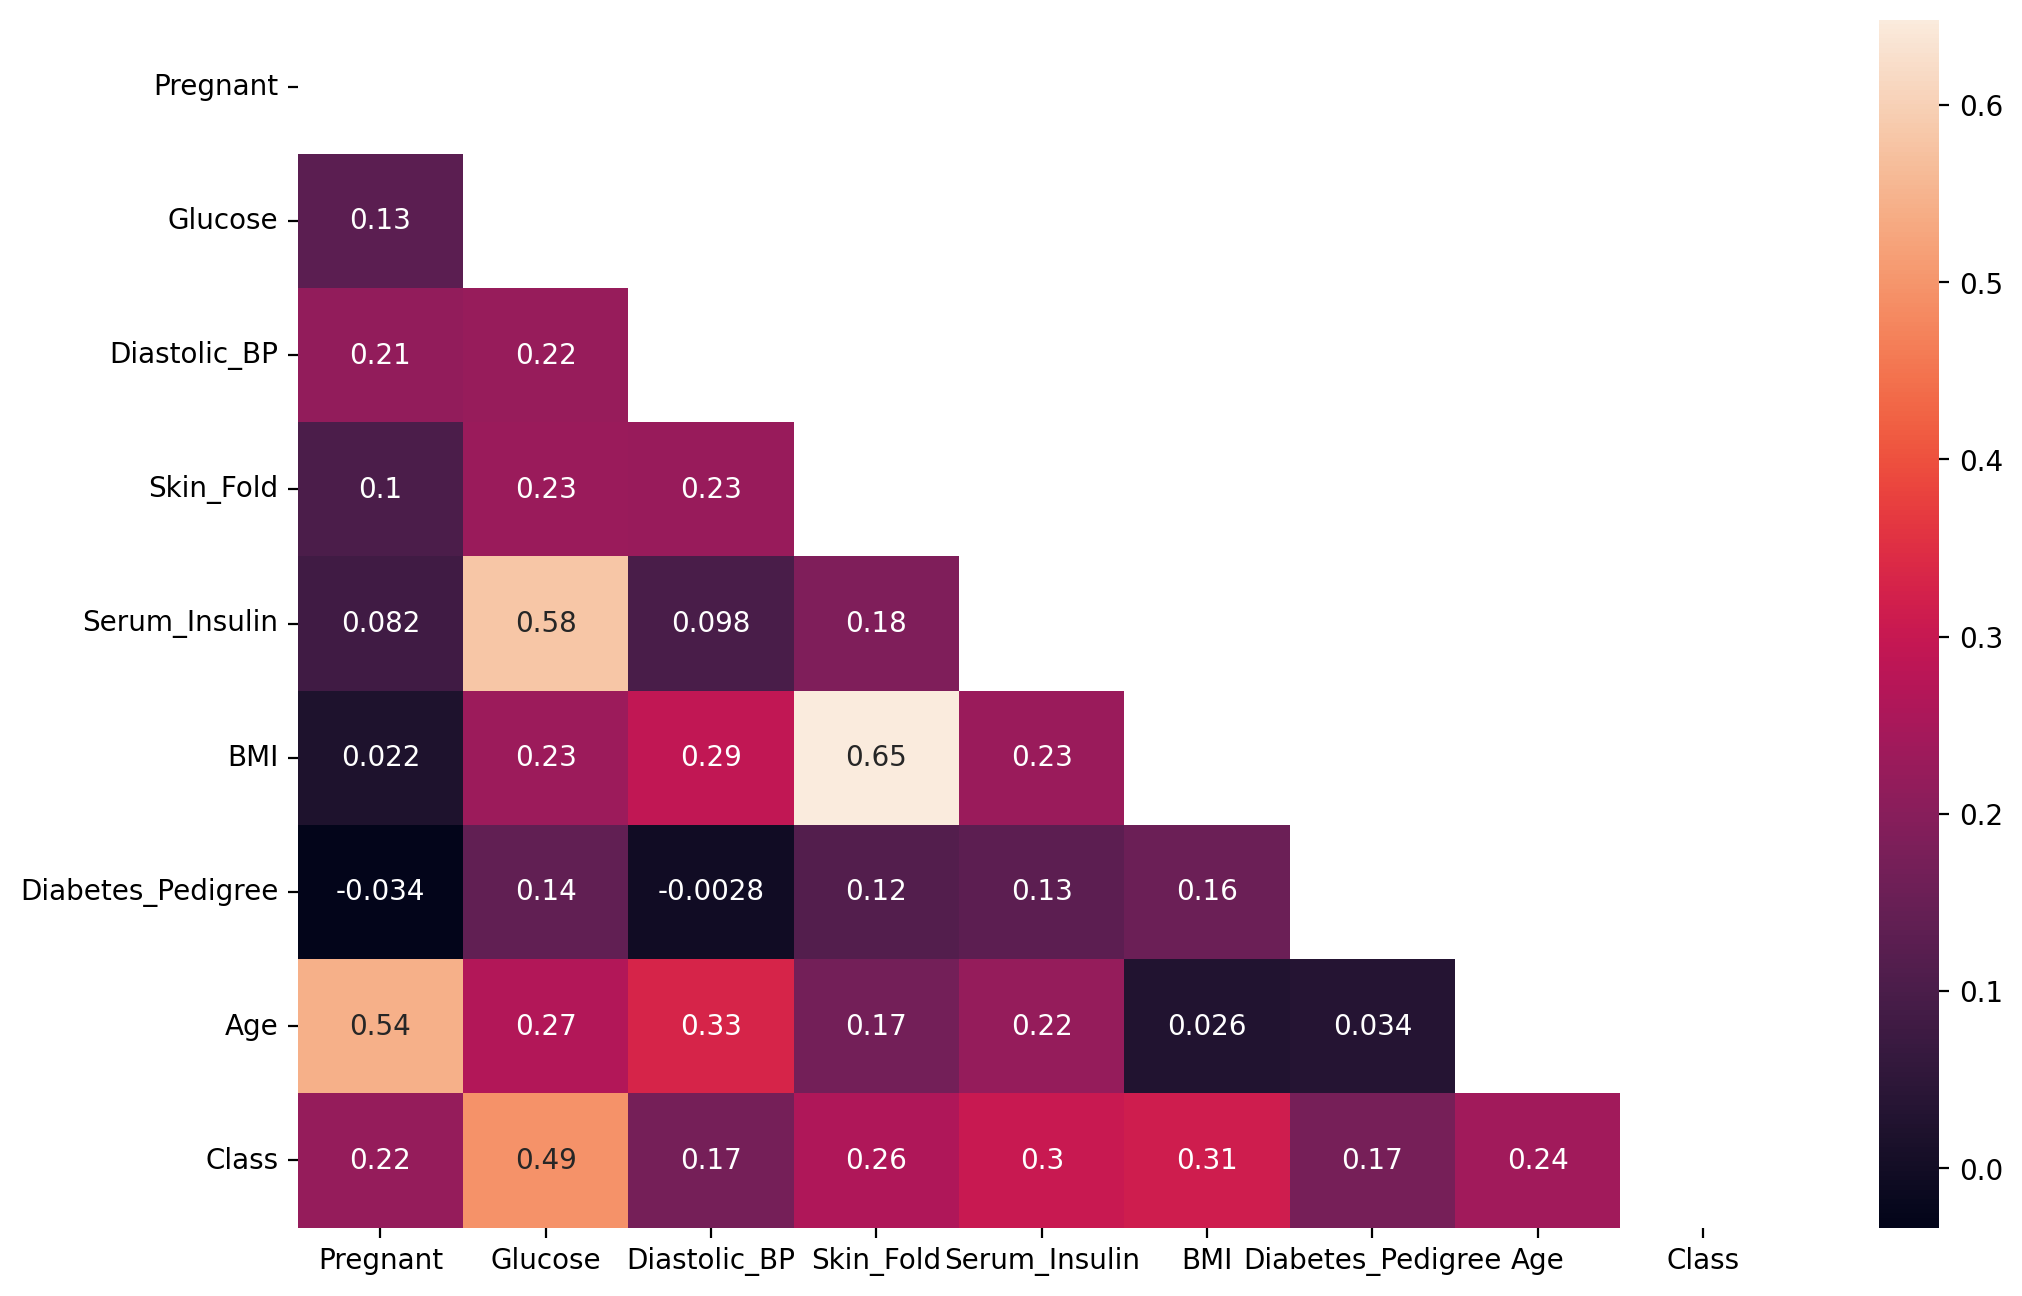

In [68]:
plt.figure(figsize=(12,8), dpi=200)
heatmap_corr(df)

## Cleaning

**1. Drop all NaN**
- This results in reducing half of the data!**

In [69]:
df = pd.read_csv('pima-indians-diabetes data.csv')

In [70]:
df_dropNaN = df.dropna()
df_dropNaN = df_dropNaN.reset_index(drop=True)
df_dropNaN

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
1,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
2,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
3,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
4,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1.0
...,...,...,...,...,...,...,...,...,...
387,0.0,181.0,88.0,44.0,510.0,43.3,0.222,26,1.0
388,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37,1.0
389,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22,0.0
390,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0.0


In [71]:
df_dropNaN.to_csv('data_processed/df_dropNaN.csv', index=False)

**2. Drop NaN on Columns with high missing values** 
- Prefer for this dataset
- Only reduce data from 768 to 724 datapoints
- Plus the column "Serum_Insulin" and"Skin_Fold" are high correlated to "Glucose" and "BMI" respectively

In [72]:
df_dropCols = df.drop(["Serum_Insulin", "Skin_Fold"], axis=1)
df_dropCols

,Pregnant,Glucose,Diastolic_BP,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63,0.0
764,2.0,122.0,70.0,36.8,0.340,27,0.0
765,5.0,121.0,72.0,26.2,0.245,30,0.0
766,1.0,126.0,60.0,30.1,0.349,47,1.0


In [73]:
df_dropCols.isna().sum()

Pregnant              0
Glucose               5
Diastolic_BP         35
BMI                  11
Diabetes_Pedigree     0
Age                   0
Class                 0
dtype: int64

In [74]:
df_dropNaN2 = df_dropCols.dropna()
df_dropNaN2 = df_dropNaN2.reset_index(drop=True)
df_dropNaN2

,Pregnant,Glucose,Diastolic_BP,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...
719,10.0,101.0,76.0,32.9,0.171,63,0.0
720,2.0,122.0,70.0,36.8,0.340,27,0.0
721,5.0,121.0,72.0,26.2,0.245,30,0.0
722,1.0,126.0,60.0,30.1,0.349,47,1.0


In [75]:
df_dropNaN2.isna().sum()

Pregnant             0
Glucose              0
Diastolic_BP         0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64

#### Save Dataset 

In [76]:
df_dropNaN2.to_csv('data_processed/df_dropNaN2.csv', index=False)

## Preprocessing
- Check Distribution
- Normalize using:
    - **StandardScaler**: Scaling normal distribution data
    - **Log Transform**: Transform skew data to normal distribution

In [77]:
df = pd.read_csv('data_processed/df_dropNaN2.csv')
df

,Pregnant,Glucose,Diastolic_BP,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...
719,10.0,101.0,76.0,32.9,0.171,63,0.0
720,2.0,122.0,70.0,36.8,0.340,27,0.0
721,5.0,121.0,72.0,26.2,0.245,30,0.0
722,1.0,126.0,60.0,30.1,0.349,47,1.0


#### Variance

In [78]:
df.var().sort_values(ascending=False)

Glucose              945.564344
Diastolic_BP         153.261189
Age                  138.424467
BMI                   47.457507
Pregnant              11.308443
Class                  0.225952
Diabetes_Pedigree      0.110433
dtype: float64

#### Distribution

array([[<AxesSubplot:title={'center':'Pregnant'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'Diastolic_BP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Diabetes_Pedigree'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

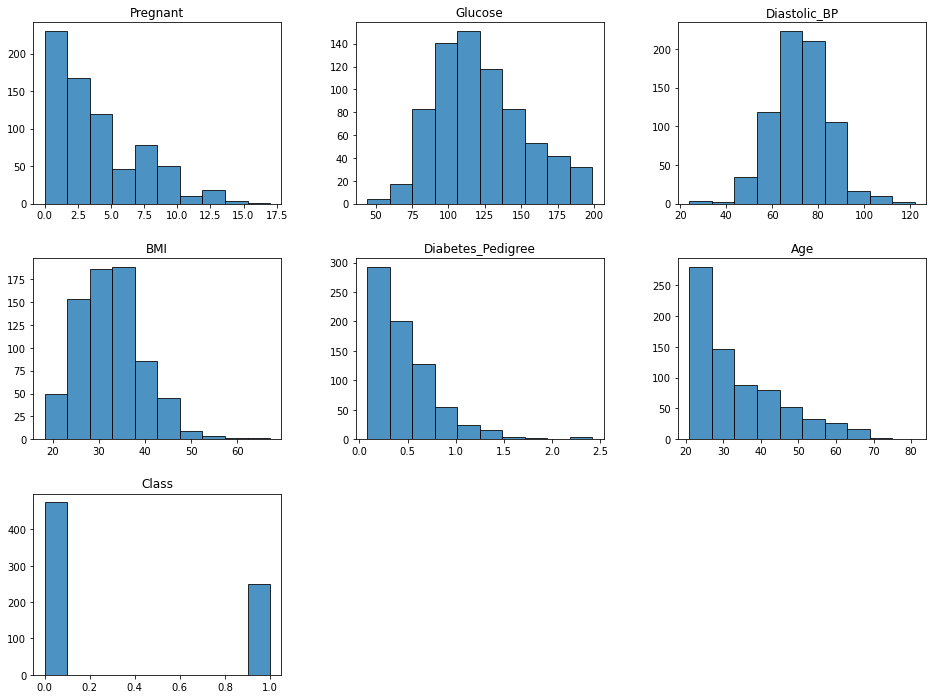

In [79]:
hist_plot_pd(df)

In [80]:
to_scale = ["Glucose", "Diastolic_BP", "BMI"]
to_log = ["Pregnant", "Diabetes_Pedigree", "Age"]

### Standard Scaler

array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'Diastolic_BP'}>],
       [<AxesSubplot:title={'center':'BMI'}>, <AxesSubplot:>]],
      dtype=object)

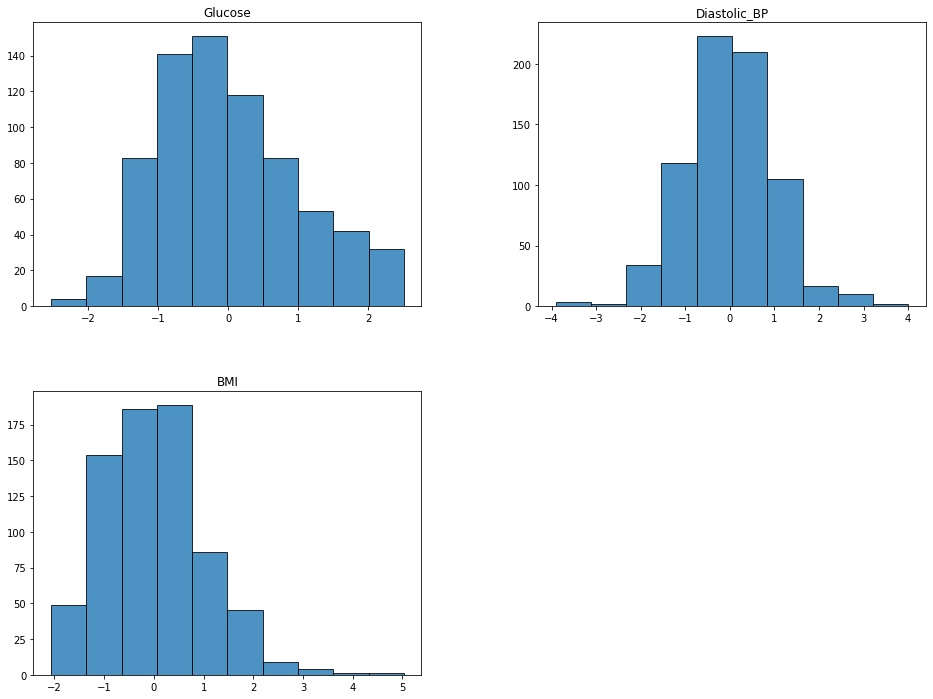

In [81]:
# Manually

for col in to_scale:
    mean, std = df[col].mean(), df[col].std()
    df[col] = (df[col] - mean) / std

hist_plot_pd(df[to_scale])

In [82]:
df = pd.read_csv('data_processed/df_dropNaN2.csv')

array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'Diastolic_BP'}>],
       [<AxesSubplot:title={'center':'BMI'}>, <AxesSubplot:>]],
      dtype=object)

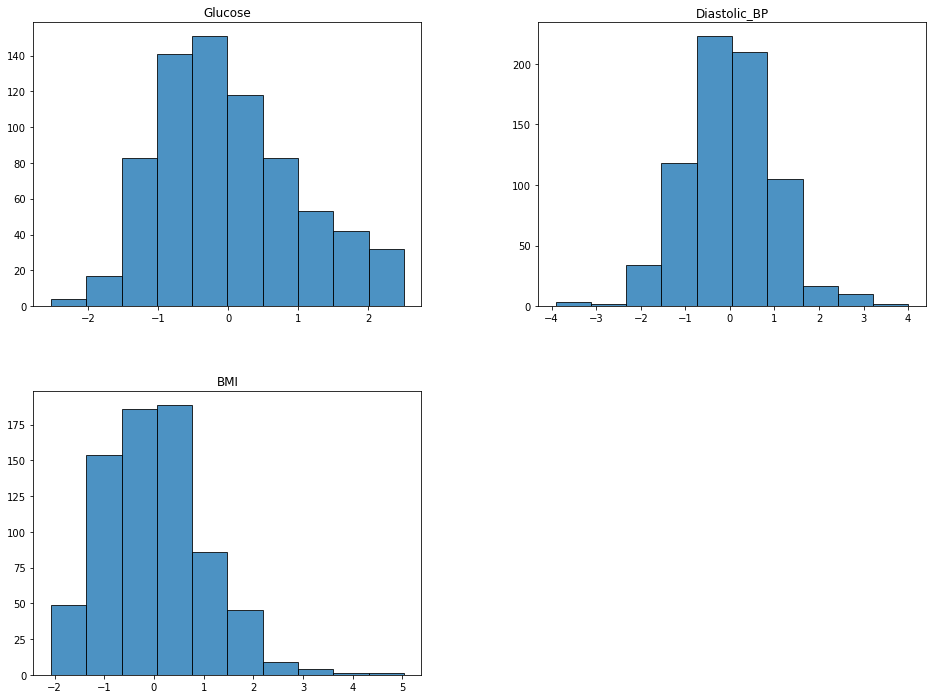

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[to_scale])

df[to_scale] = pd.DataFrame(scaler.transform(df[to_scale]), columns=to_scale)

hist_plot_pd(df[to_scale])

### Log Transform

In [84]:
df = pd.read_csv('data_processed/df_dropNaN2.csv')

**Standard Scaler can't make skew column to be normal distribution**

array([[<AxesSubplot:title={'center':'Pregnant'}>,
        <AxesSubplot:title={'center':'Diabetes_Pedigree'}>],
       [<AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

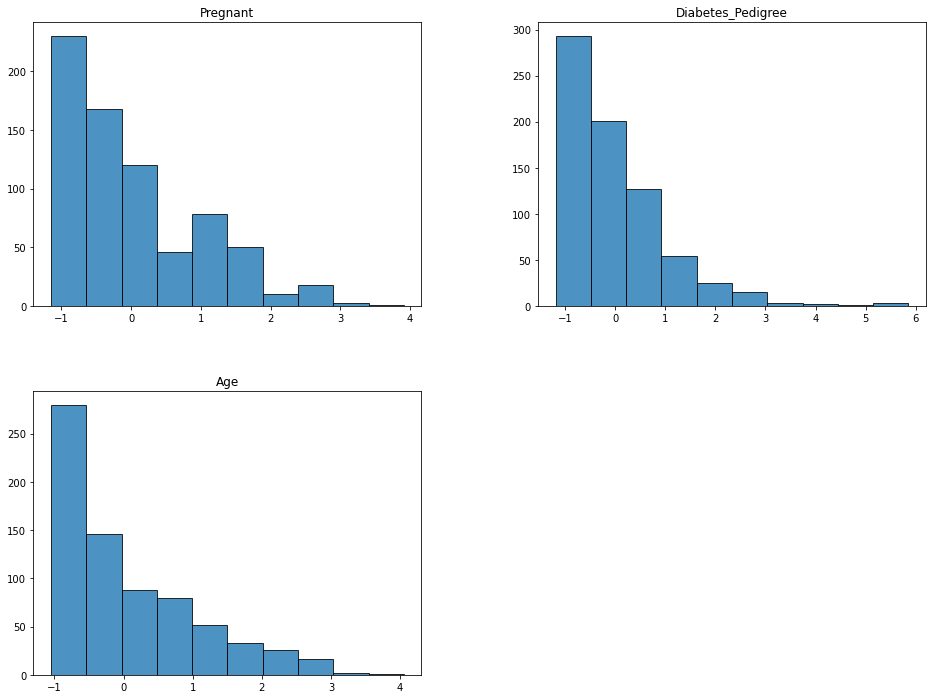

In [85]:
scaler = StandardScaler()

scaler.fit(df[to_log])
df[to_log] = pd.DataFrame(scaler.transform(df[to_log]), columns=to_log)

hist_plot_pd(df[to_log])

In [86]:
df = pd.read_csv('data_processed/df_dropNaN2.csv')

array([[<AxesSubplot:title={'center':'Pregnant'}>,
        <AxesSubplot:title={'center':'Diabetes_Pedigree'}>],
       [<AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

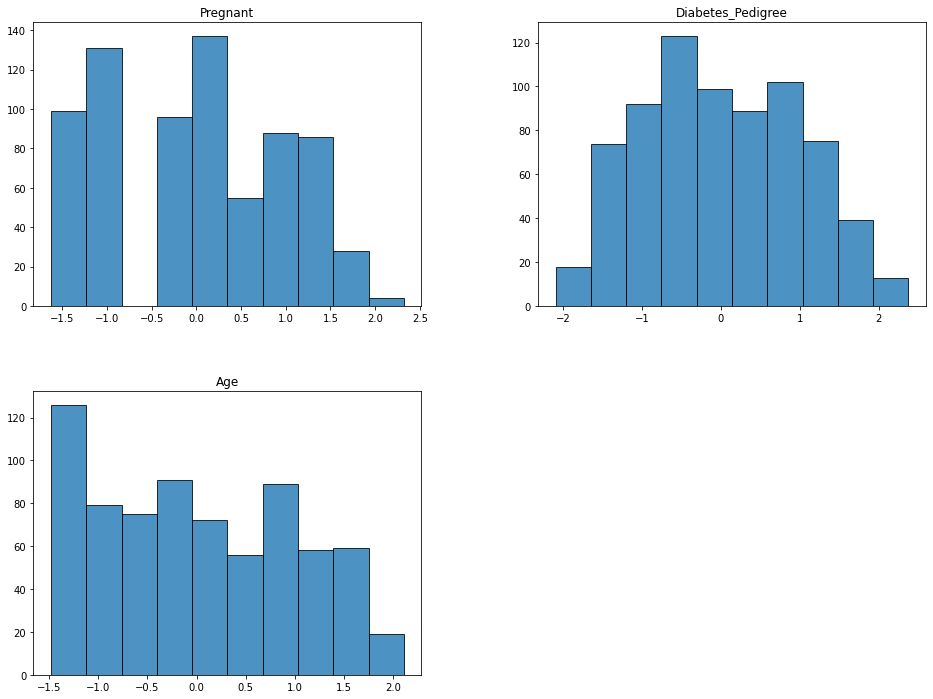

In [87]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

df[to_log] = pd.DataFrame(
    pt.fit_transform(df[to_log]), columns=to_log
)

hist_plot_pd(df[to_log])

array([[<AxesSubplot:title={'center':'Pregnant'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'Diastolic_BP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Diabetes_Pedigree'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

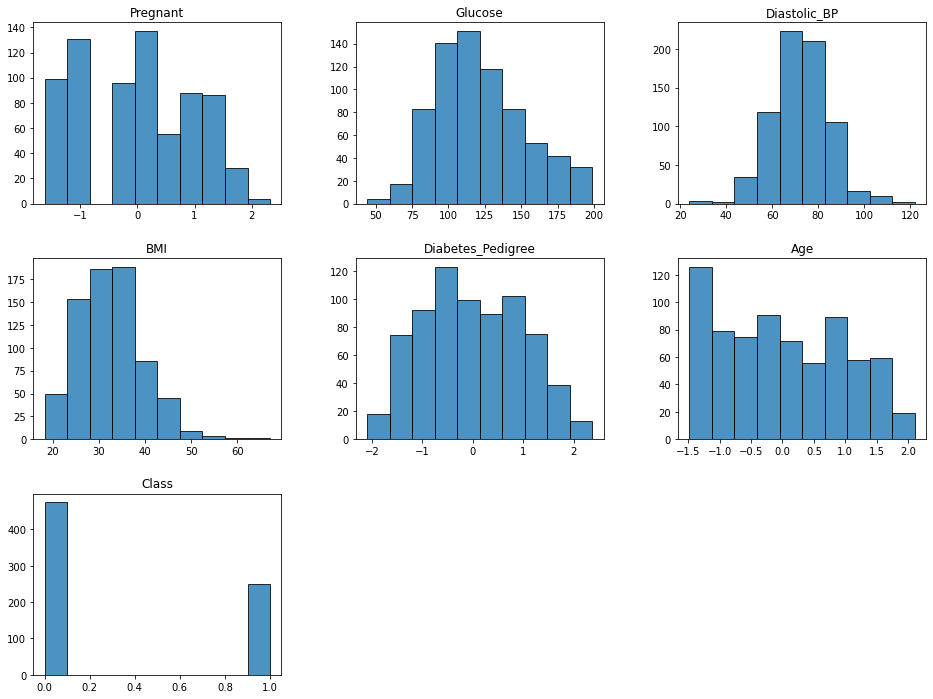

In [88]:
hist_plot_pd(df)